In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Read image as gray scale

In [6]:
img = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',0)
# cv.imread(img, x) => x=-1 : read unchanged, x=0 : read grayscale, x = 1 : read color) 

### Plot with imshow

In [5]:
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

### Plot with matplotlib

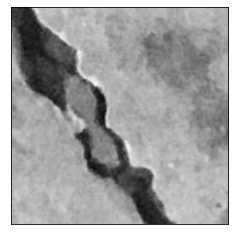

In [7]:
# plotting with matplotlib => something about BGR vs RGB and possible wrong displaying!
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Image Numpy array info

In [7]:
print(img)
print(type(img))
print(img.dtype)
print(img.ndim)
print(img.shape)

[[ 52  46  40 ... 130 124 118]
 [ 53  44  37 ... 128 123 118]
 [ 57  48  40 ... 129 124 120]
 ...
 [135 133 130 ... 102 100  98]
 [134 132 129 ... 102 100  98]
 [132 131 127 ... 102 100  98]]
<class 'numpy.ndarray'>
uint8
2
(227, 227)


### Edge detection on image read as gray

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


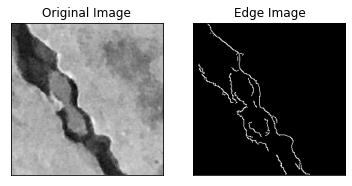

In [8]:
edges = cv.Canny(img,100,200) # apertureSize=7 gives fragmented image !
print(edges)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Read image unchanged and convert to gray scale

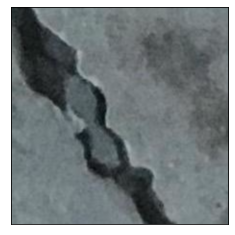

In [9]:
# read unchanged and convert to grayscale
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)

plt.imshow(imgUnchanged, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

### Blur to reduce (background) noise

In [10]:
# Blur
blur = cv.blur(img,(5,5))

In [11]:
# Gaussian blur
gauss = cv.GaussianBlur(img,(5,5),0)

In [12]:
# Median blur
median = cv.medianBlur(img,5)

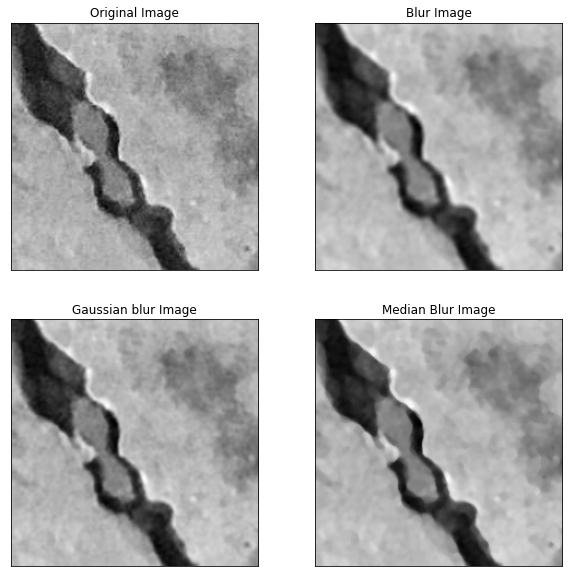

In [13]:
# Comparison
plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median,cmap = 'gray')
plt.title('Median Blur Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Algorithm 'An improved image processing method for assessing multiplecracking development in Strain Hardening Cementitious Composites'

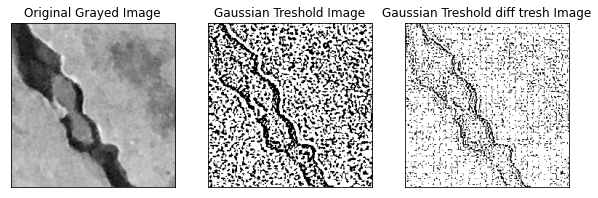

In [14]:
# create binary image from image (gives black and white image like edge detection)
# => use adaptive treshold, Gaussian

# Input needs to be gray scaled imaged so read unchanged and convert to grayscale
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)
# Gaussian tresholds
th = cv.adaptiveThreshold(grayed,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
th2 = cv.adaptiveThreshold(grayed,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,3,2)

plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(grayed,cmap = 'gray')
plt.title('Original Grayed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(th,cmap = 'gray')
plt.title('Gaussian Treshold Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(th2, cmap = 'gray')
plt.title('Gaussian Treshold diff tresh Image'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# Is Canny Edge not better??

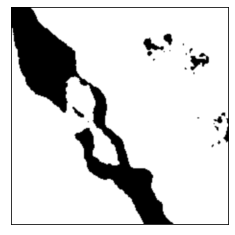

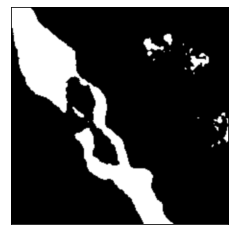

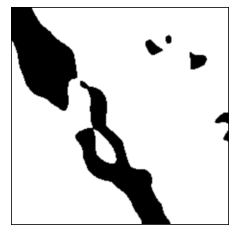

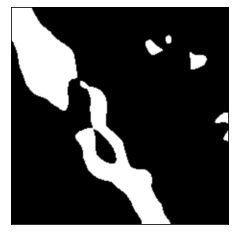

In [52]:
# Try Otsu's thresholding after Gaussian filtering
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)

# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
blur = cv.GaussianBlur(grayed,(5,5),0) # kernelsize tuple must be odd and positive
blur2 = cv.GaussianBlur(grayed,(21,21),0) # kernelsize tuple must be odd and positive
# plt.imshow(blur, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
# plt.show()

ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
# Same but inversed binary threshold
ret4,th4 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(th4, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

ret3,th3 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
# Same but inversed binary threshold
ret4,th4 = cv.threshold(blur2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(th4, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

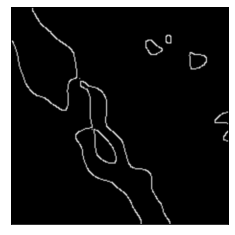

In [53]:
edges = cv.Canny(th4,100,200,apertureSize =7)

plt.imshow(edges,cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [17]:
print(edges)
#np.set_printoptions(threshold=np.inf)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Find contours and draw bounding boxes around cracks

In [101]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [102]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

In [103]:
drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

In [104]:
# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [22]:
# Show in a window
cv.imshow('Contours', drawing)
cv.waitKey(0) # press any key to close img show window !
cv.destroyAllWindows()

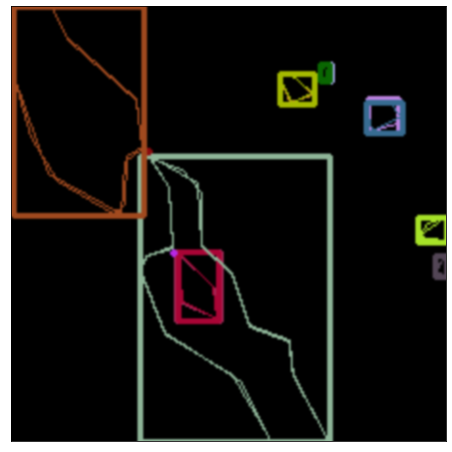

In [105]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [25]:
# epsilon = 0.1*cv.arcLength(cnt,True)
# approx = cv.approxPolyDP(cnt,epsilon,True)

#### Minimum area rotated bounding boxes => issue with plotting them, so ignore this section for now

In [26]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [28]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
    #boundRect[i] = cv.boundingRect(contours_poly[i])
    rect = cv.minAreaRect(contours_poly[i])
    box = cv.boxPoints(rect)
    box = np.int0(box)
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
#rect = cv.minAreaRect(cnt)
#box = cv.boxPoints(rect)
#box = np.int0(box)
#cv.drawContours(img,[box],0,(0,0,255),2)

In [29]:
drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)


In [37]:
# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(img,[box],0,(0,0,255),2)
    #cv.drawContours(drawing, contours_poly, i, color)
    #cv.rectangle(drawing, (int(rect[i][0]), int(rect[i][1])), \
     #(int(rect[i][0]+rect[i][2]), int(rect[i][1]+rect[i][3])), color, 2)

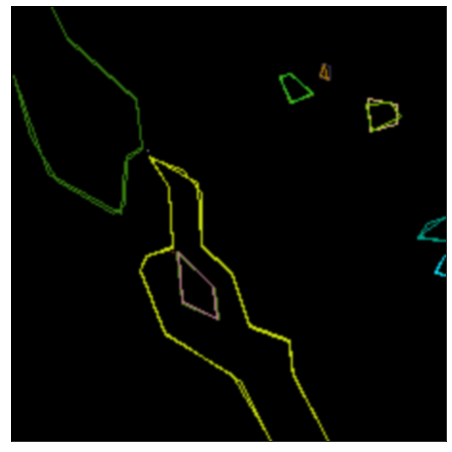

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

#### Finding extreme points in contour to derive a measure for crack size

In [117]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [118]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

In [119]:
drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

In [120]:
# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    #cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     #(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [121]:
# Find extreme points in contour and plot a circle in those places
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    # Draw dots onto image
    #cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
    ## cv.circle(image, center_coordinates, radius, color, thickness)
    cv.circle(drawing, leftmost, 1, (0, 50, 255), 2)
    cv.circle(drawing, rightmost, 1, (0, 255, 255), 2)
    cv.circle(drawing, topmost, 1, (255, 50, 0), 2)
    cv.circle(drawing, bottommost, 1, (255, 255, 0), 2)

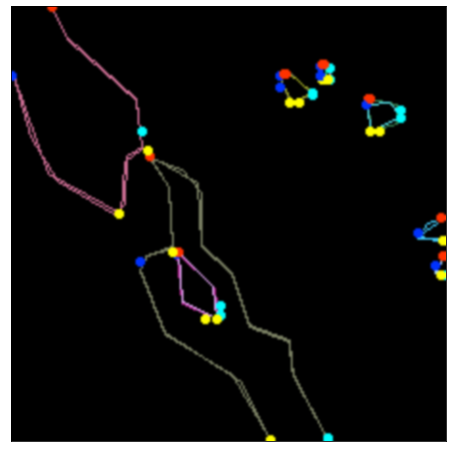

In [123]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

#### Draw lines between extreme points

In [ ]:
## cv2.line(image, start_point, end_point, color, thickness)

In [124]:
# Draw a line between leftmost-rightmost and topmost-bottommost
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    # Draw dots onto image
    #cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
    ## cv.circle(image, center_coordinates, radius, color, thickness)
    cv.circle(drawing, leftmost, 1, (0, 50, 255), 2)
    cv.circle(drawing, rightmost, 1, (0, 255, 255), 2)
    cv.circle(drawing, topmost, 1, (255, 50, 0), 2)
    cv.circle(drawing, bottommost, 1, (255, 255, 0), 2)
    
    cv.line(drawing, leftmost, rightmost, (0, 255, 0) , 1)
    cv.line(drawing, topmost, bottommost, (0, 255, 0) , 1)
    

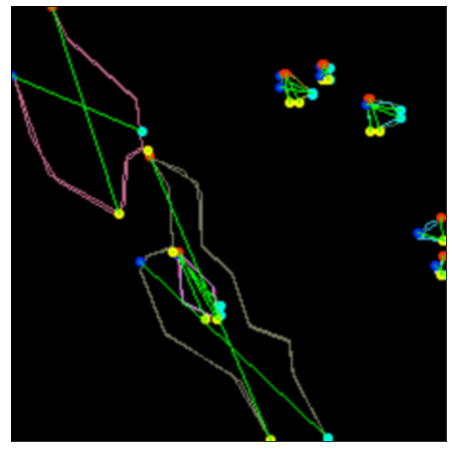

In [125]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

#### Euclidean distance between two points

In [126]:
import math
"""
# two tuples as arguments like this gives error, i fixed it below
def distance((x1,y1),(x2,y2)): 
    return math.sqrt((x2-x1)**2 - (y2-y1)**2)
"""
def distance(a,b): # a,b are 2 tuples a = (x1,y1), b= (x2,y2)
    #print(a[0],a[1],b[0],b[1])
    return int(math.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2))

In [127]:
# Measure Euclidean distance betweens leftmost-rightmost and topmost-bottommost
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    # Draw dots/circles onto image
    #cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
    ## cv.circle(image, center_coordinates, radius, color, thickness)
    cv.circle(drawing, leftmost, 1, (0, 50, 255), 2)
    cv.circle(drawing, rightmost, 1, (0, 255, 255), 2)
    cv.circle(drawing, topmost, 1, (255, 50, 0), 2)
    cv.circle(drawing, bottommost, 1, (255, 255, 0), 2)
    # Draw lines on image
    ## cv.line(image, start_point, end_point, color, thickness)
    cv.line(drawing, leftmost, rightmost, (0, 255, 0) , 1)
    cv.line(drawing, topmost, bottommost, (0, 255, 0) , 1)
    print(f"left-right : {distance(leftmost,rightmost)}")
    print(f"top-bottom: {distance(topmost,bottommost)}")

left-right : 7
top-bottom: 10
left-right : 40
top-bottom: 38
left-right : 35
top-bottom: 40
left-right : 0
top-bottom: 0
left-right : 14
top-bottom: 12
left-right : 134
top-bottom: 160
left-right : 0
top-bottom: 0
left-right : 19
top-bottom: 17
left-right : 18
top-bottom: 17
left-right : 19
top-bottom: 15
left-right : 17
top-bottom: 16
left-right : 8
top-bottom: 8
left-right : 6
top-bottom: 8
left-right : 73
top-bottom: 113


In [ ]:
# Ideally I'd have distance leftmost-rightmost as a lenght and a perpendicular distance measurement for width
# so find perpendicular greatest distance, use only 1 axis

#### Find perpendicular longest distance on longest line in contour

In [ ]:
'''
Find the slope m = (y_1 - y_2)/(x_1 - x_2), then solve the equation y = mx + b for b using y_1 for y, and x_1 for x (or you can use your second coordinate).
'''

In [10]:
import numpy as np
a = np.array([3, 1])

b = np.array([9])

x = np.linalg.solve(a, b)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

#### Mask contour

In [ ]:
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)

In [31]:
imgUnchanged2 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00038.jpg',-1) 
grayed2 = cv.cvtColor(imgUnchanged2, cv.COLOR_BGR2GRAY)

In [66]:
# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
#blur = cv.GaussianBlur(grayed2,(21,21),0) # kernelsize tuple must be odd and positive

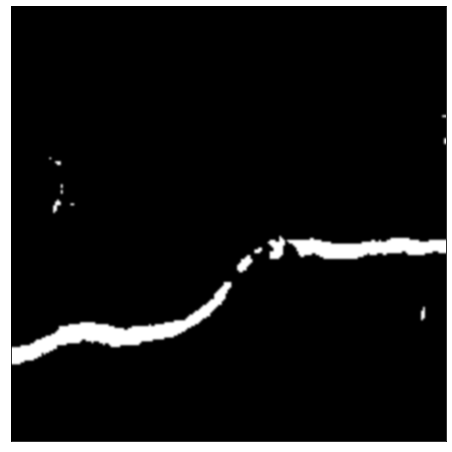

In [68]:
ret,th = cv.threshold(grayed2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(th,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
        

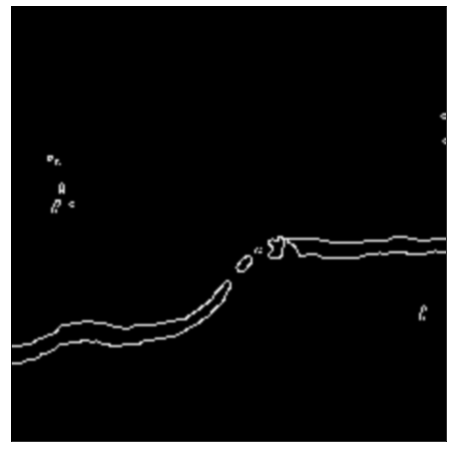

In [69]:
edges = cv.Canny(th,100,200) # apertureSize=7 gives fragmented image !
plt.figure(figsize=(8,8))
plt.imshow(edges,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
        

In [70]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


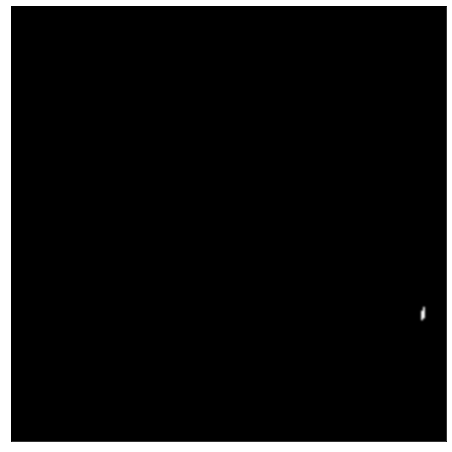

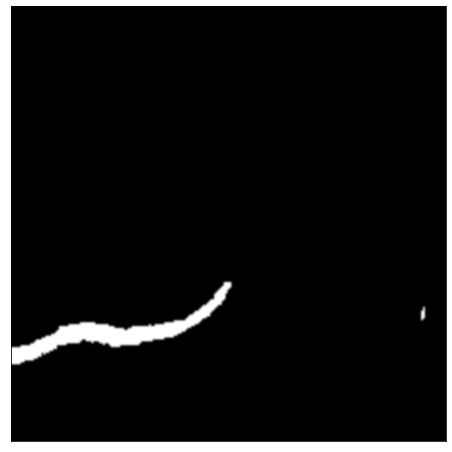

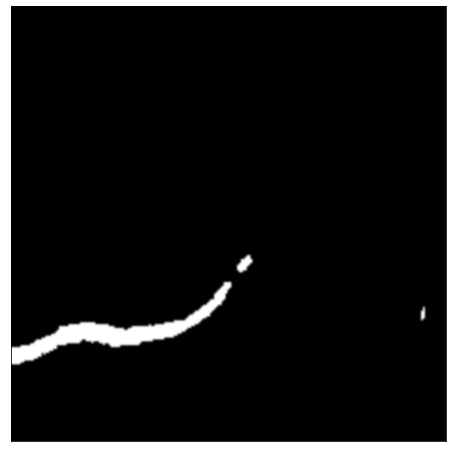

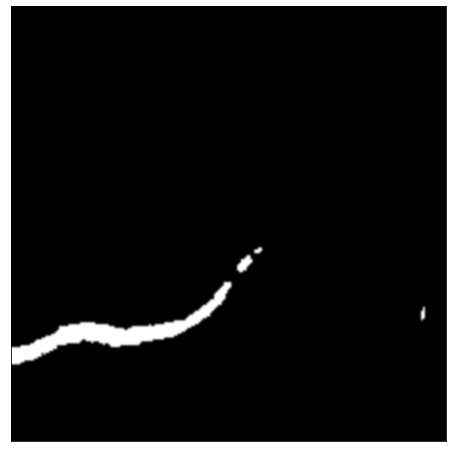

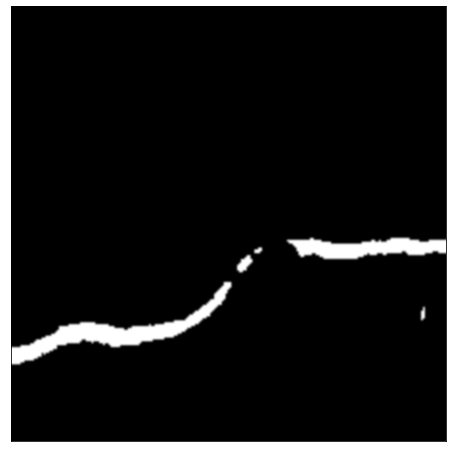

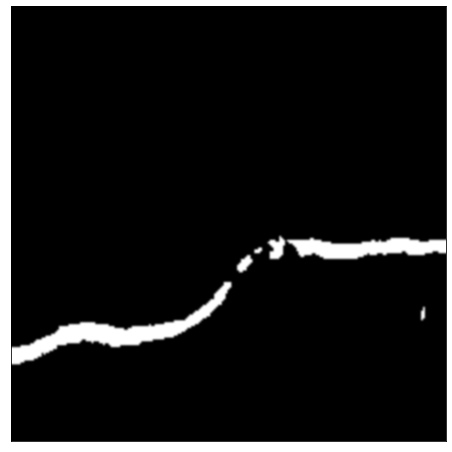

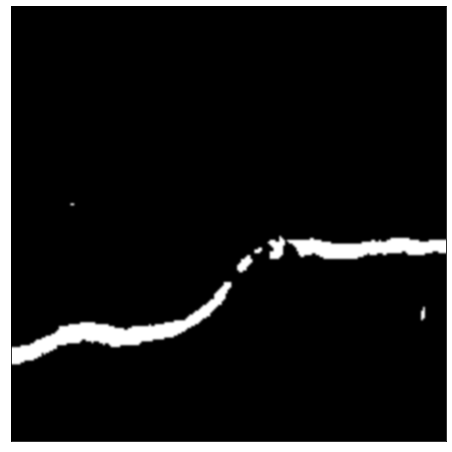

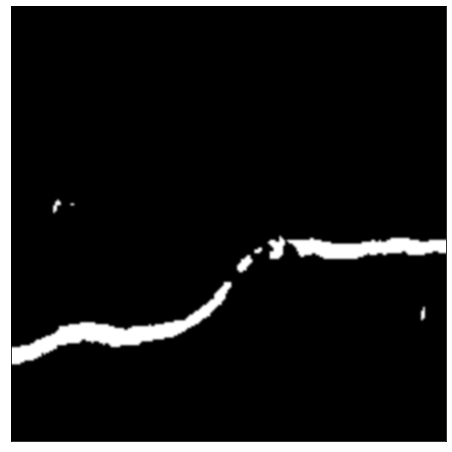

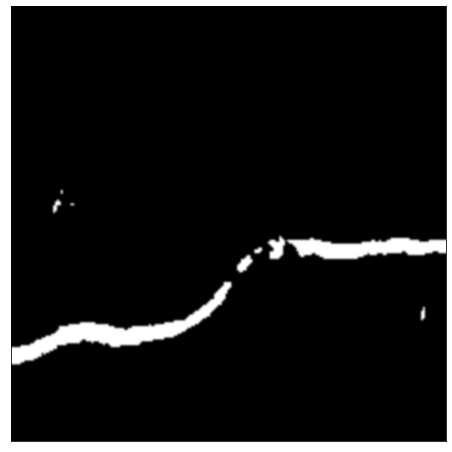

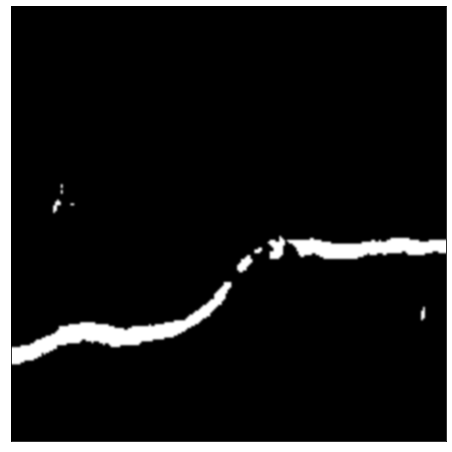

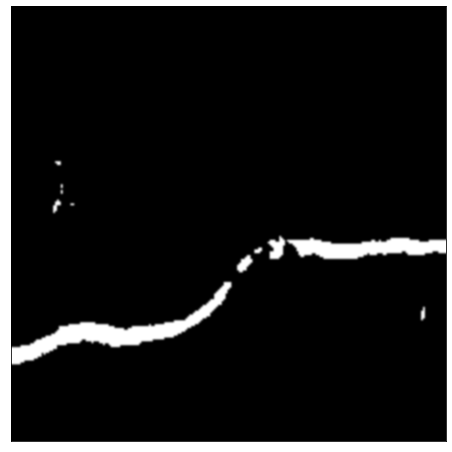

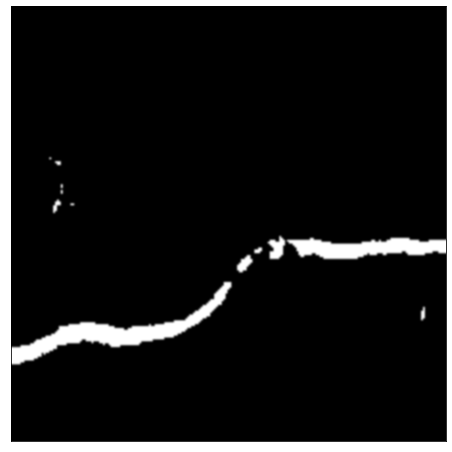

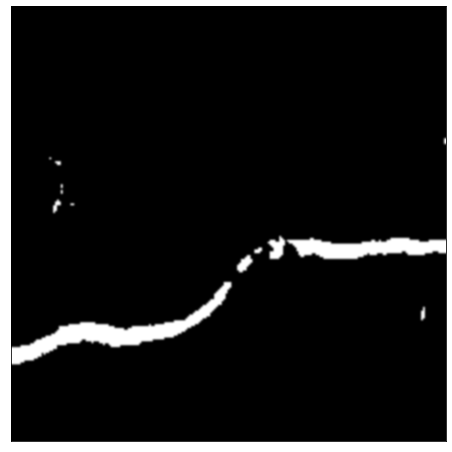

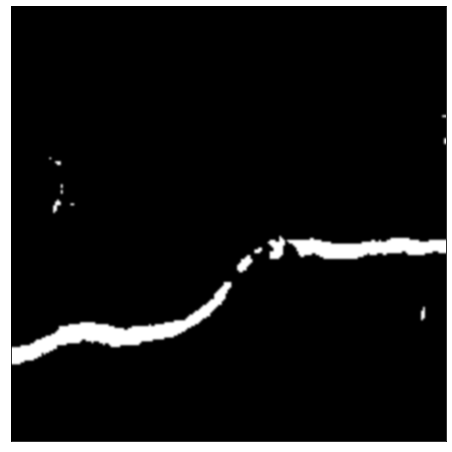

In [71]:
mask = np.zeros(edges.shape,np.uint8)
for cnt in contours:
    cv.drawContours(mask,[cnt],0,255,-1)
    pixelpoints = np.transpose(np.nonzero(mask))
    plt.figure(figsize=(8,8))
    plt.imshow(mask,cmap = 'gray', interpolation = 'bicubic') 
    plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
    plt.show()
        

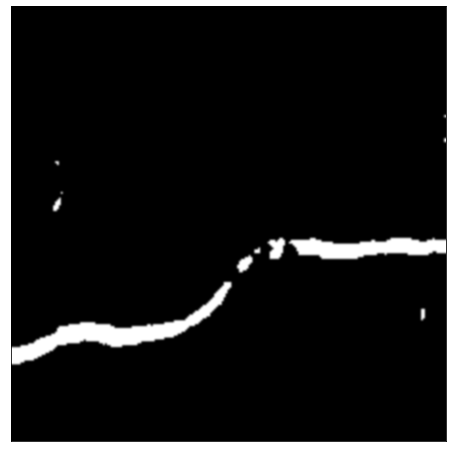

In [65]:
plt.figure(figsize=(8,8))
plt.imshow(mask,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [18]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

#### MMGL2D

In [295]:
imgUnchanged2 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00038.jpg',-1) 
grayed2 = cv.cvtColor(imgUnchanged2, cv.COLOR_BGR2GRAY)
grayed2 = cv.GaussianBlur(grayed2,(3,3),0)

In [122]:
print(grayed2)

[[147 147 147 ... 171 173 173]
 [147 148 148 ... 171 172 172]
 [149 149 150 ... 171 172 172]
 ...
 [189 189 189 ... 158 156 155]
 [189 189 189 ... 158 156 155]
 [189 189 189 ... 158 156 155]]


In [296]:
maxi = np.max(grayed2)
print(maxi)
print(type(maxi))
mini = np.min(grayed2)
print(mini)

233
<class 'numpy.uint8'>
38


In [297]:
tau = 0.5
Ra = 2
with np.nditer(grayed2, op_flags=['readwrite']) as it:
    for x in it:
        #prod = x*Ra
        #prodinv = int(x/Ra)
        #print(prod, prodinv)
        if x > mini + tau * (maxi-mini):
            x[...] = np.minimum(maxi, x*Ra)
        else:
            x[...] = np.maximum(mini, x/Ra)
np.set_printoptions(threshold=np.inf)
print(grayed2)

[[233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233
  233 233 233 233 233 233 233 233 233 233 233]
 [233 233 233 233 233 233 233 233 233 233 233 233 233 233 233 233

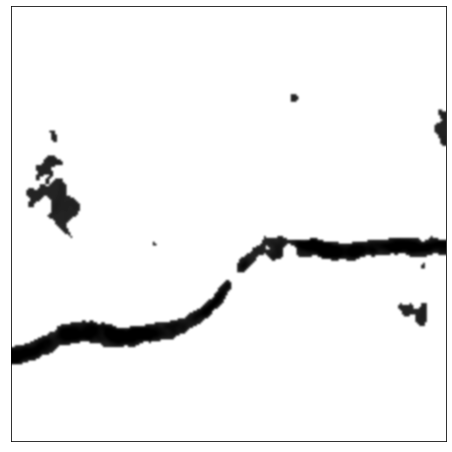

In [125]:
plt.figure(figsize=(8,8))
plt.imshow(grayed2,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

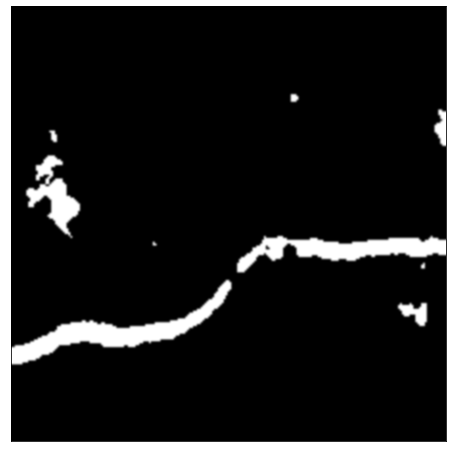

In [298]:
ret,th = cv.threshold(grayed2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(th,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [128]:
np.set_printoptions(threshold=np.inf)
print(th)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [299]:
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


In [251]:
print(contours)
print(type(contours))
print(len(contours))

[array([[[203, 155]],

       [[202, 156]],

       [[202, 157]],

       [[204, 159]],

       [[204, 160]],

       [[205, 161]],

       [[207, 161]],

       [[208, 160]],

       [[210, 160]],

       [[211, 161]],

       [[211, 164]],

       [[213, 166]],

       [[215, 166]],

       [[215, 165]],

       [[216, 164]],

       [[216, 155]],

       [[214, 155]],

       [[214, 156]],

       [[212, 158]],

       [[210, 158]],

       [[209, 157]],

       [[209, 156]],

       [[208, 155]],

       [[207, 156]],

       [[204, 156]]], dtype=int32), array([[[112, 143]],

       [[108, 147]],

       [[108, 148]],

       [[106, 150]],

       [[106, 151]],

       [[104, 153]],

       [[103, 153]],

       [[ 98, 158]],

       [[ 97, 158]],

       [[ 96, 159]],

       [[ 95, 159]],

       [[ 94, 160]],

       [[ 93, 160]],

       [[ 90, 163]],

       [[ 87, 163]],

       [[ 86, 164]],

       [[ 83, 164]],

       [[ 82, 165]],

       [[ 75, 165]],

       [[ 74, 166

In [134]:
print(grayed2.shape)

(227, 227)


In [300]:
print(len(contours))
for cnt in contours:
    #print(cnt)
    print(cv.contourArea(cnt))
    if len(cnt)>=5:
        (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
        print(MA/ma)
    else:
        print(f"1")
print(f"==================")
for idx,cnt in enumerate(contours):
    #print(cnt)
    print(cv.contourArea(cnt))
    if len(cnt)>=5:
        (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
        print(MA/ma)
    else:
        print(f"1")

11
78.5
0.5322850136770593
994.0
0.20079258776106607
1.5
1
0.5
1
790.5
0.14052633028631542
5.5
1.0
393.5
0.6332534757370557
4.0
0.7071067492167155
8.5
0.4818888949816231
53.0
0.45757466709918143
8.0
0.8164966301212718
78.5
0.5322850136770593
994.0
0.20079258776106607
1.5
1
0.5
1
790.5
0.14052633028631542
5.5
1.0
393.5
0.6332534757370557
4.0
0.7071067492167155
8.5
0.4818888949816231
53.0
0.45757466709918143
8.0
0.8164966301212718


In [301]:
#contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
im_ratio_frac = round(0.001*(grayed2.shape[0]*grayed2.shape[1]))
print(im_ratio_frac)
for idx, cnt in enumerate(contours):
    #ind = contours.index(cnt)
    area = cv.contourArea(cnt)
    if len(cnt)>=5:
        (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
        ari = MA/ma
        if area <= im_ratio_frac or ari > 0.35:
            contours.pop(idx)
    else: 
        ari = 1
        if area <= im_ratio_frac or ari > 0.35:
            contours.pop(idx)
    
    print(area)
    print(ari)
    #if area <= im_ratio_frac or ari > 0.35:
        #contours.pop(idx)
print(len(contours))
"""
    if area <= im_ratio_frac:
        contours.pop(idx)
    if len(cnt)>=5:
        (x,y),(MA,ma),angle = cv.fitEllipse(cnt)
        if MA/ma > 0.5:
            contours.pop(idx)
"""

        
print(len(contours))
print(contours)

11
52
78.5
0.5322850136770593
1.5
1
790.5
0.14052633028631542
5.5
1.0
4.0
0.7071067492167155
53.0
0.45757466709918143
6
6
[array([[[112, 143]],

       [[108, 147]],

       [[108, 148]],

       [[106, 150]],

       [[106, 151]],

       [[104, 153]],

       [[103, 153]],

       [[ 98, 158]],

       [[ 97, 158]],

       [[ 96, 159]],

       [[ 95, 159]],

       [[ 94, 160]],

       [[ 93, 160]],

       [[ 90, 163]],

       [[ 87, 163]],

       [[ 86, 164]],

       [[ 83, 164]],

       [[ 82, 165]],

       [[ 75, 165]],

       [[ 74, 166]],

       [[ 70, 166]],

       [[ 69, 167]],

       [[ 62, 167]],

       [[ 61, 168]],

       [[ 55, 168]],

       [[ 54, 167]],

       [[ 53, 167]],

       [[ 52, 166]],

       [[ 49, 166]],

       [[ 48, 165]],

       [[ 47, 165]],

       [[ 46, 166]],

       [[ 45, 166]],

       [[ 44, 165]],

       [[ 43, 165]],

       [[ 42, 164]],

       [[ 41, 164]],

       [[ 40, 165]],

       [[ 39, 165]],

       [[ 38, 164]]

In [291]:
for idx, cnt in enumerate(contours):
    print(cv.contourArea(cnt))
    print(len(cnt))

994.0
126
0.5
3
790.5
106
393.5
84
8.5
8
8.0
6


In [292]:
drawing = np.zeros((th.shape[0], th.shape[1], 3), dtype=np.uint8)
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours, i, color) #_poly
    #cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     #(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [302]:
for cnt in contours:
    print(cv.contourArea(cnt))

994.0
0.5
790.5
393.5
8.5
8.0


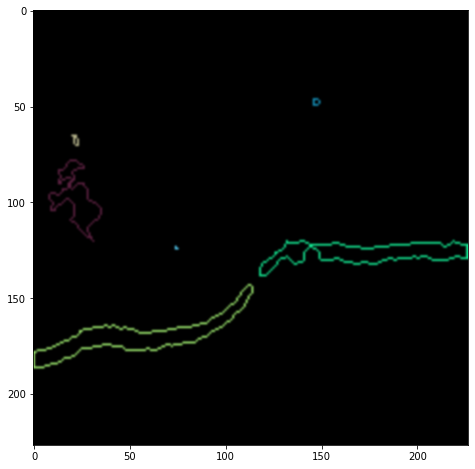

In [294]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
#plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()